<a href="https://colab.research.google.com/github/leosilvinob/Segmentacao-de-clientes/blob/main/Agrupamento_e_Segmenta%C3%A7%C3%A3o_de_Clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Departamento de marketing

- Dados: https://www.kaggle.com/arjunbhasin2013/ccdata



## Importação das bibliotecas e base de dados

In [1]:
 ! pip install -q kaggle

In [2]:
 ! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download arjunbhasin2013/ccdata

  0% 0.00/340k [00:00<?, ?B/s]
100% 340k/340k [00:00<00:00, 46.4MB/s]


In [6]:
! unzip ccdata

Archive:  ccdata.zip
  inflating: CC GENERAL.csv          


In [34]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [9]:
df = pd.read_csv('CC GENERAL.csv')

In [10]:
df.shape

(8950, 18)

In [ ]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


###Verificando se há valores vazios

In [12]:
df.isnull().sum().sort_values(ascending=False).head()

MINIMUM_PAYMENTS       313
CREDIT_LIMIT             1
TENURE                   0
PURCHASES_FREQUENCY      0
BALANCE                  0
dtype: int64

###Susbtituindo os valores vazios pela média

In [14]:
df.loc[(df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].mean()
df.loc[(df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=df['CREDIT_LIMIT'].mean()

In [46]:
#Deletando a coluna CUST_ID, não será necessária
df.drop('CUST_ID', axis = 1, inplace = True)

###Observando visualmente elementos com outliers

Plot relativo há alguns elementos selecionados: A Data Subset


<Figure size 576x396 with 0 Axes>

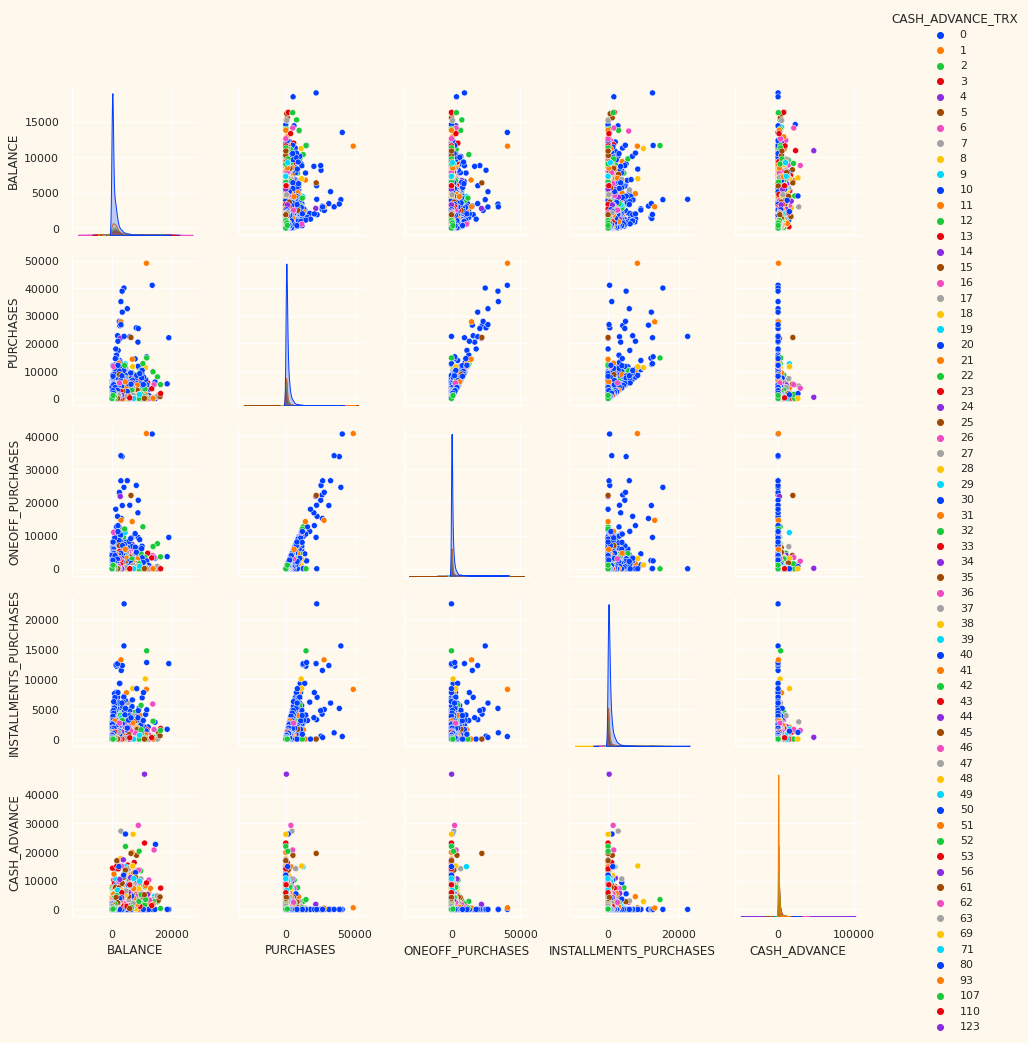

In [42]:
#To plot some selected features 
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = [ "BALANCE", "PURCHASES", "ONEOFF_PURCHASES", "INSTALLMENTS_PURCHASES", "CASH_ADVANCE", "CASH_ADVANCE_TRX"]
print("Plot relativo há alguns elementos selecionados: A Data Subset")
plt.figure()
sns.pairplot(df[To_Plot], hue= "CASH_ADVANCE_TRX",palette='bright')
#Taking hue 
plt.show()

In [44]:
#Eliminando os outliers utilizando um valor máximo nos atributos Cash Advance e Installments Purchases. 
df = df[(df["CASH_ADVANCE"]<20250)]
df = df[(df["INSTALLMENTS_PURCHASES"]<42423)]
print("The total number of data-points after removing the outliers are:", len(df))

The total number of data-points after removing the outliers are: 8940


## Visualização e exploração dos dados

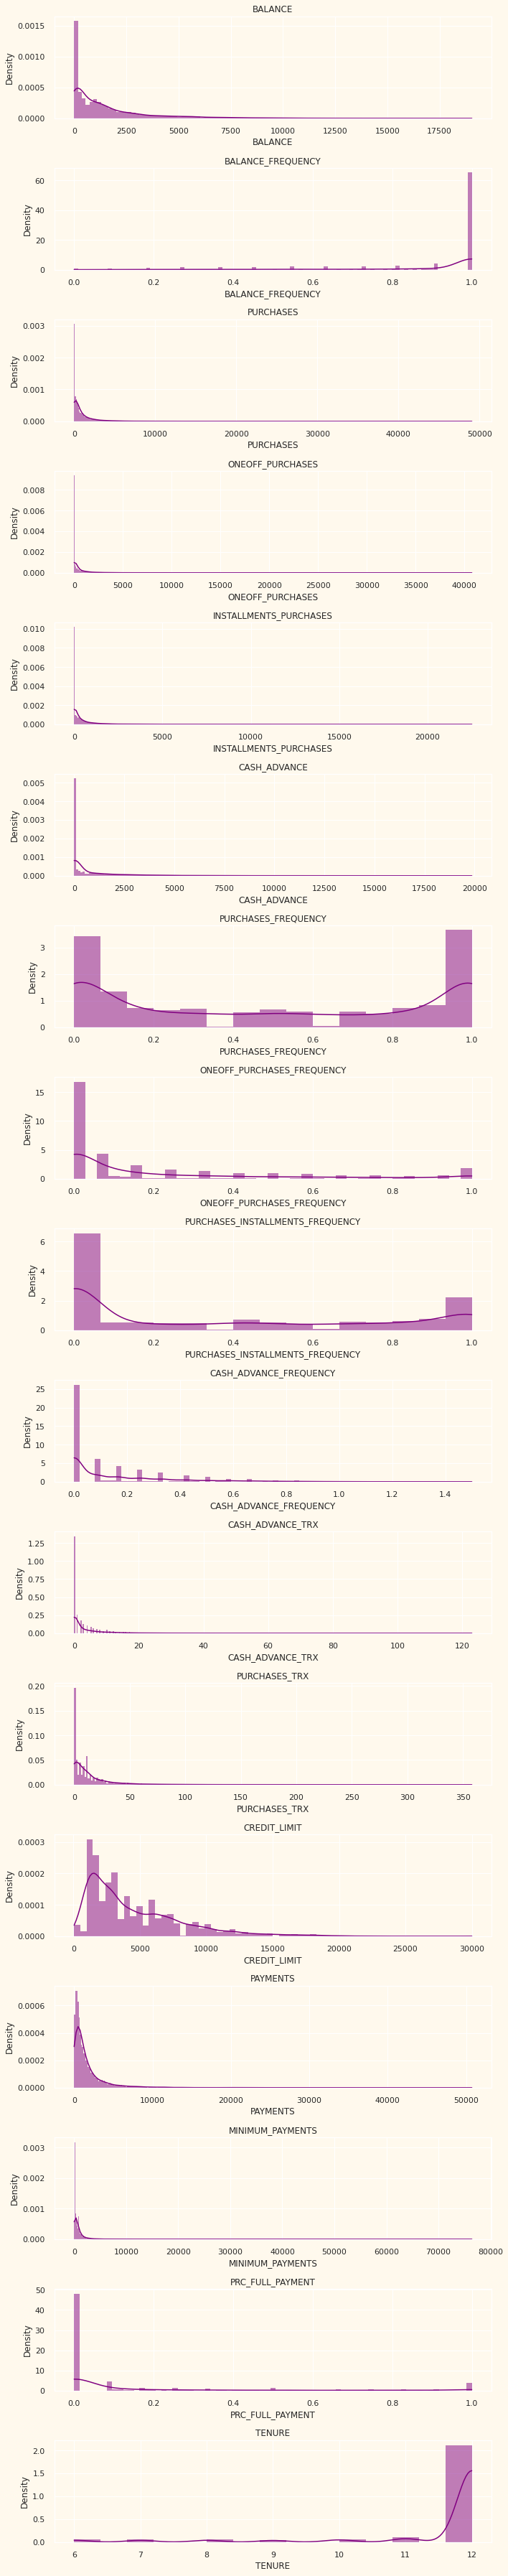

In [59]:
plt.figure(figsize=(10,50))
for i in range(len(df.columns)):
  plt.subplot(17, 1, i + 1)
  sns.histplot(df[df.columns[i]], kde = True, color = 'purple', stat = 'density', linewidth = 0,label='100% Equities')
  plt.title(df.columns[i])
plt.tight_layout();

In [60]:
correlations = df.corr()

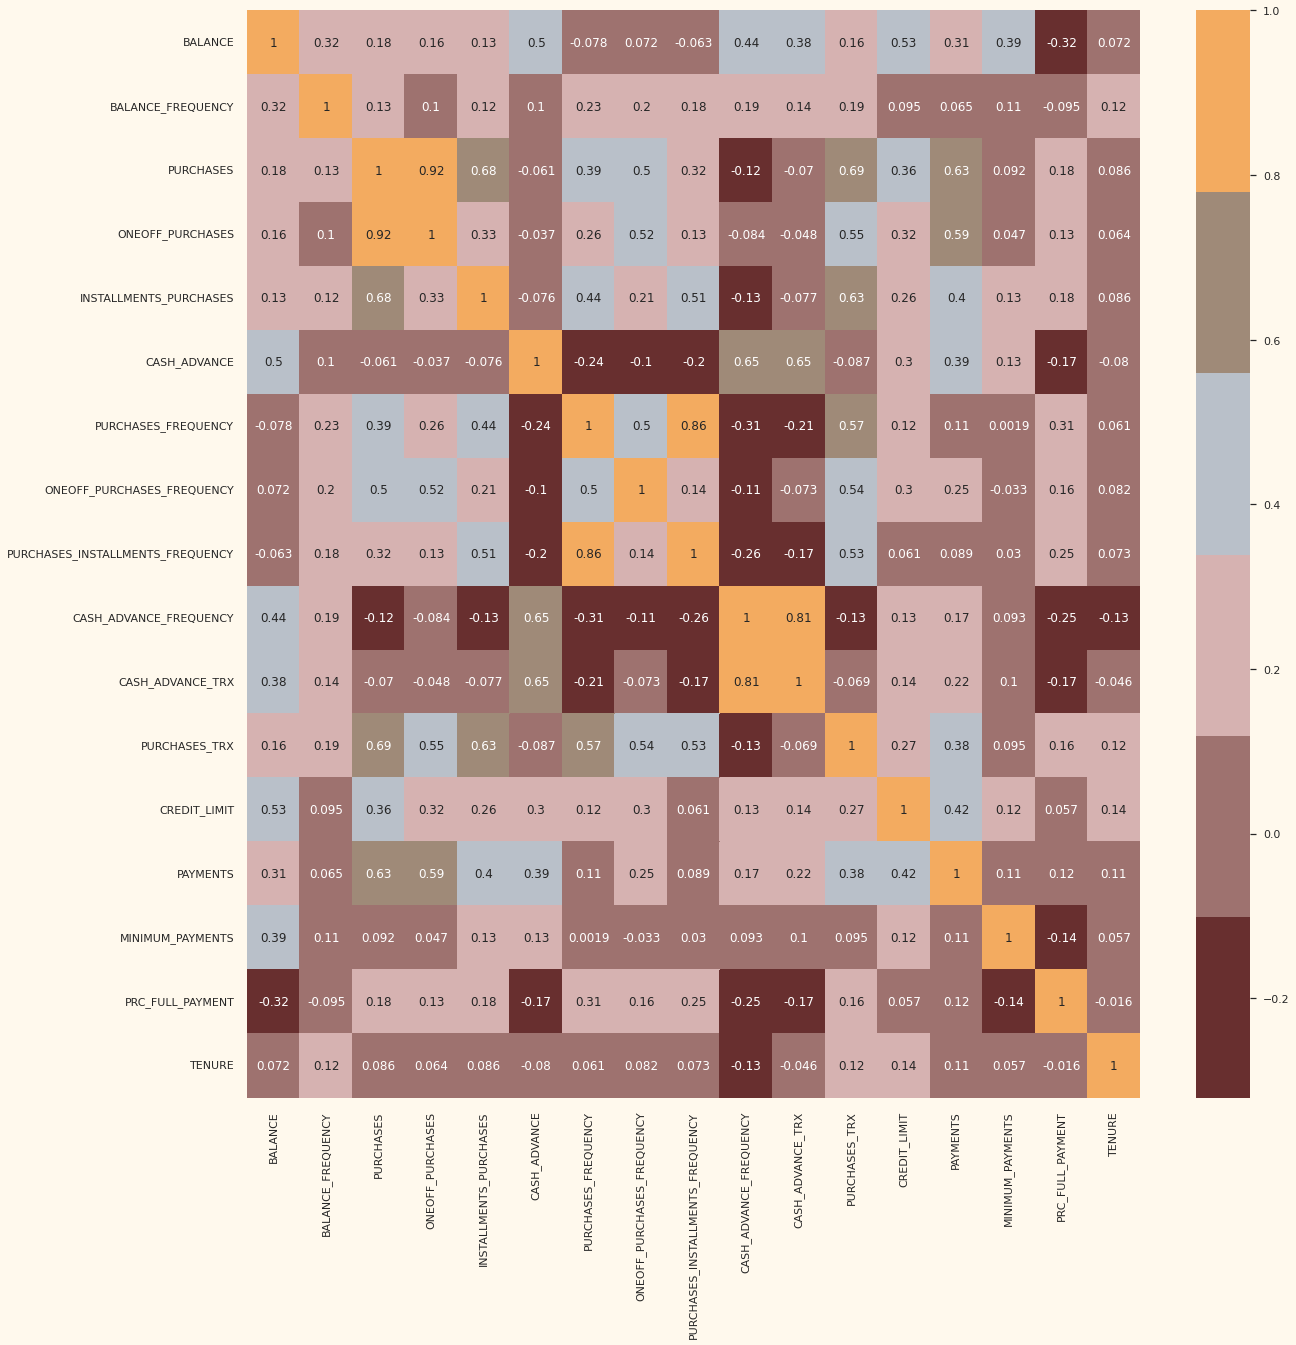

In [62]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True,cmap = cmap);

## Pré-processamento de dados
Aqui será realizado a normalização de dados, para poderem serem utilizados no treinamento do modelo.



In [64]:
scaler = StandardScaler()
scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df),columns= df.columns )

In [65]:
type(scaled_df), type(df)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [69]:
min(scaled_df['BALANCE']), max(scaled_df['BALANCE'])

(-0.7538150853234776, 8.469219654858852)

In [66]:
scaled_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.734006,-0.248923,-0.424515,-0.356589,-0.348724,-0.500053,-0.806703,-0.678431,-0.707367,-0.675190,-0.483317,-0.511053,-0.961066,-0.541736,-0.310372,-0.525399,0.360824
1,0.797214,0.134677,-0.469164,-0.356589,-0.454233,2.890140,-1.222010,-0.678431,-0.917046,0.579339,0.118913,-0.591502,0.693789,0.862638,0.091793,0.234105,0.360824
2,0.454644,0.518276,-0.107302,0.109109,-0.454233,-0.500053,1.269829,2.674353,-0.917046,-0.675190,-0.483317,-0.108809,0.831694,-0.390448,-0.100081,-0.525399,0.360824
3,0.053392,-1.016123,0.232404,0.546293,-0.454233,-0.391770,-1.014358,-0.399034,-0.917046,-0.257015,-0.332759,-0.551278,0.831694,-0.614381,0.002062,-0.525399,0.360824
4,-0.357777,0.518276,-0.461676,-0.346952,-0.454233,-0.500053,-1.014358,-0.399034,-0.917046,-0.675190,-0.483317,-0.551278,-0.905905,-0.370193,-0.264983,-0.525399,0.360824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8935,-0.740015,0.518276,-0.332913,-0.356589,-0.132265,-0.500053,1.269829,-0.678431,1.179752,-0.675190,-0.483317,-0.350155,-0.961066,-0.497173,-0.349442,1.183486,-4.120448
8936,-0.744524,0.518276,-0.328757,-0.356589,-0.122444,-0.500053,1.269829,-0.678431,1.179752,-0.675190,-0.483317,-0.350155,-0.961066,-0.515076,0.002062,-0.525399,-4.120448
8937,-0.742483,-0.184992,-0.401581,-0.356589,-0.294532,-0.500053,0.854521,-0.678431,0.760394,-0.675190,-0.483317,-0.390380,-0.961066,-0.585125,-0.334986,0.329044,-4.120448
8938,-0.747297,-0.184992,-0.469164,-0.356589,-0.454233,-0.480817,-1.222010,-0.678431,-0.917046,0.161164,-0.182202,-0.591502,-1.098971,-0.595464,-0.346481,0.329044,-4.120448


#Redução de Dimensionalidade
Em uma situação com diversos elementos ou atributos diferentes e ainda sim correlacionados, pode-se usar um me método de Redução de Dimensionalidade antes do modelo ser treinado, o que também facilita a visualização dos dados, nesse caso os nossos cluesters.
Será utilizado PCA(Principal Component Analysis) para a Redução de Dimensionalidade.

In [72]:
#Inicializando o PCA para ser reduzido a três atributos
pca = PCA(n_components=3)
pca.fit(scaled_df)
PCA_df = pd.DataFrame(pca.transform(scaled_df), columns=(["att1","att2", "att3"]))
PCA_df.describe()

,att1,att2,att3
count,8.940000e+03,8.940000e+03,8.940000e+03
mean,5.082810e-16,1.280979e-16,-2.200452e-16
std,2.159328e+00,1.851620e+00,1.227509e+00
min,-2.872957e+00,-2.721373e+00,-9.397526e+00
25%,-1.498276e+00,-1.274831e+00,-7.827752e-01
50%,-4.459124e-01,-4.956131e-01,5.321043e-02
75%,7.782382e-01,7.409130e-01,5.662867e-01
max,2.970851e+01,1.419991e+01,1.705473e+01


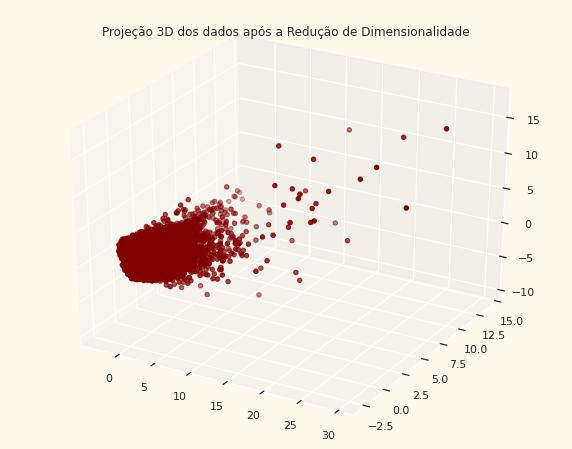

In [73]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_df["att1"]
y =PCA_df["att2"]
z =PCA_df["att3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("Projeção 3D dos dados após a Redução de Dimensionalidade")
plt.show()

## Clusterização
Agora que reduzido os atributos para três dimensões, vai ser realizado o agrupamento por meio do a *Agglomerative clustering*. O  *Agglomerative clustering* é um método de agrupamento hierárquico. Envolve a fusão de exemplos até que o número desejado de clusters seja alcançado.

Para a escolha do número desejado vai ser utilizado o *Elbow Method*.

In [ ]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

Elbow Method para determinar o número de agrupamentos a serem formados :


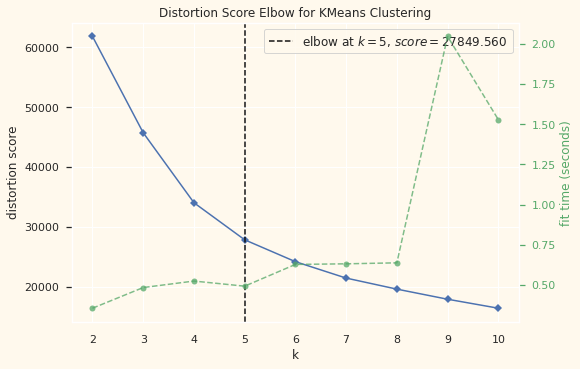

In [75]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method para determinar o número de agrupamentos a serem formados :')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_df)
Elbow_M.show()

Como acima mostrado foi obtido que o número ideal de agrupamentos são 4. Agora será realizado o *Agglomerative Clustering* para obter os agrupamentos finais.

In [87]:
#Inicializando o modelo de  Agglomerative Clustering 
AC = AgglomerativeClustering(n_clusters=4)
# Ajustamento de modelo e predizendo os agrupamentos
yhat_AC = AC.fit_predict(PCA_df)
PCA_df["Agrupamentos"] = yhat_AC
#Adicionando os agrupamnetos ao dataframe original
df["Agrupamentos"]= yhat_AC

Em seguida será visualizado os agrupamentos.

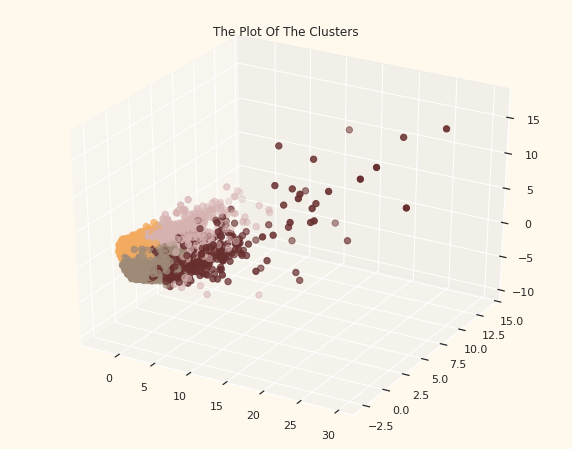

In [88]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df["Agrupamentos"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

###Avaliando o  modelo
Por ser um modelo não supervisionado, não temos dados de testes ou algum recurso para pontuar o modelo, logo será realizado de modo visual através de gráficos o comportamento dos agrupamentos.

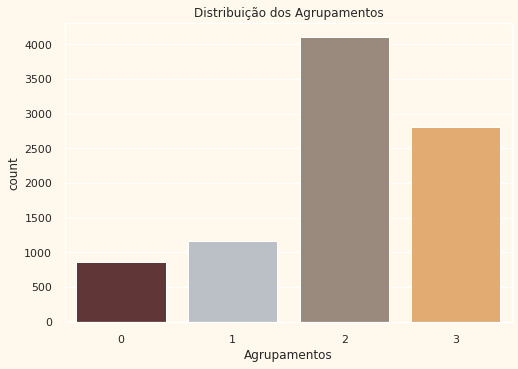

In [89]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["Agrupamentos"], palette= pal)
pl.set_title("Distribuição dos Agrupamentos")
plt.show()

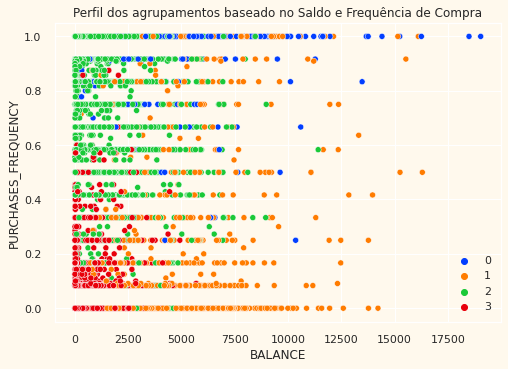

In [95]:
pl = sns.scatterplot(data = df,x=df["BALANCE"], y=df["PURCHASES_FREQUENCY"],hue=df["Agrupamentos"], palette= 'bright')
pl.set_title("Perfil dos agrupamentos baseado no Saldo e Frequência de Compra")
plt.legend()
plt.show()

**O plot do saldo versus frequência de compras pode nos informar algumas informações quanto aos grupos obtidos:**

*   Grupo 0: Saldo moderado e alta frequências de compra
*   Grupo 1: Saldo moderado e baixa frequências de compra
*   Grupo 2: Saldo baixo e alta frequências de compra
*   Grupo 3: Saldo baixo e moderada frequências de compra


A seguir pode ser vistos outras visualizações possíveis, semelhantes ao gráfico acima.

In [ ]:
plt.figure(figsize=(10,50))
for i in range(len(df.columns)-1):
  pl = sns.scatterplot(data = df,x=df.columns[i], y=df.columns[i+1],hue=df["Agrupamentos"], palette= 'bright')
  pl.set_title("Perfil dos agrupamentos baseado no " + df.columns[i] + " e " + df.columns[i+1])
  plt.legend()
  plt.show()
#plt.tight_layout();

Agora vamos observer cada atributo individualmente em relação a cada agrupamento.

In [ ]:
for i in df.columns:
  plt.figure(figsize=(35,5))
  for j in range(4):
    plt.subplot(1, 4, j + 1)
    cluster = df[df['Agrupamentos'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nAgrupamento {}'.format(i, j))
  plt.show()

Ao final vai ser criado um dataframe organizado por ordem de agrupamento e criado um arquivo em formado csv e xls(Excel) desse dataframe.

In [105]:
df_ordered = df.sort_values(by = 'Agrupamentos')
df_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Agrupamentos
4282,2004.816462,1.0,20747.34,13007.07,7740.27,0.000000,1.0,1.000000,1.000000,0.000000,0,95,10000.0,17005.409690,410.800069,1.000000,12,0
1349,2153.498372,1.0,5428.77,3064.59,2364.18,2399.569867,1.0,0.500000,1.000000,0.166667,3,45,12500.0,4059.375700,496.075078,0.083333,12,0
3513,190.650694,1.0,1954.08,776.49,1177.59,0.000000,1.0,0.583333,1.000000,0.000000,0,64,4000.0,2012.696604,177.147238,1.000000,12,0
1343,319.388468,1.0,1674.90,689.23,985.67,0.000000,1.0,1.000000,0.833333,0.000000,0,24,7500.0,1907.796411,194.793488,0.083333,12,0
1342,5161.854898,1.0,4542.33,4051.67,490.66,0.000000,1.0,1.000000,0.583333,0.000000,0,105,7500.0,3376.379090,1171.273248,0.000000,12,0


In [106]:
df_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Agrupamentos
6200,1610.282389,1.000000,0.00,0.00,0.0,1296.078691,0.000000,0.000000,0.000000,0.500000,9,0,5000.0,576.468692,374.736257,0.0,12,3
6202,1313.003662,0.888889,810.27,810.27,0.0,759.000431,0.111111,0.111111,0.000000,0.111111,2,1,1500.0,256.967584,7011.077671,0.0,9,3
6203,1433.699563,1.000000,50.00,50.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1500.0,275.687079,457.454141,0.0,12,3
6189,595.870472,0.818182,990.00,990.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,3000.0,764.868430,226.198010,0.0,12,3
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.0,12,3


In [107]:
df_ordered.to_csv('agrupamento_clientes.csv')
df_ordered.to_csv('agrupamento_clientes.xls')

#Conclusões
Com as análises obtidas não só podem ser feitas campanhas de marketing, mas também entender o comportamento dos clientes, saber quais deles pagam em dia, quais pagam atrasados, suas frequências de compras, etc. Informações estas que podem e devem ser utilizadas para tomada de decisões estratégicas.

Comentando ao que é referente ao lado técnico do código, acredito que pode-se ser encontrado gráficos ainda mais importantes, o que releva a importância de ter um profissional da área ao lado, neste caso um gestor de carteiras de cartão de crédito, para poder ser extraído ainda melhores insights sobre os clientes.

